In [92]:
import numpy as np
import random
from sklearn.neural_network import MLPRegressor

def f(x):
    return np.sin(x - 2)

def init_x(step=0, diff=0.05):
    return np.arange(-1-step, 1+step, diff)

init_arr = np.arange(-5, 5, 1)

train_x = np.array(init_arr)
train_y = np.array(list(map(f, train_x)))

model = MLPRegressor(
    activation='tanh',
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(5, 2), 
    random_state=1
)

model.fit([[x] for x in train_x], [[x] for x in train_y])
score = model.score([[x] for x in train_x], [x for x in train_y])

c:\Users\semen\.virtualenvs\IIAI-CEPDaYsW\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


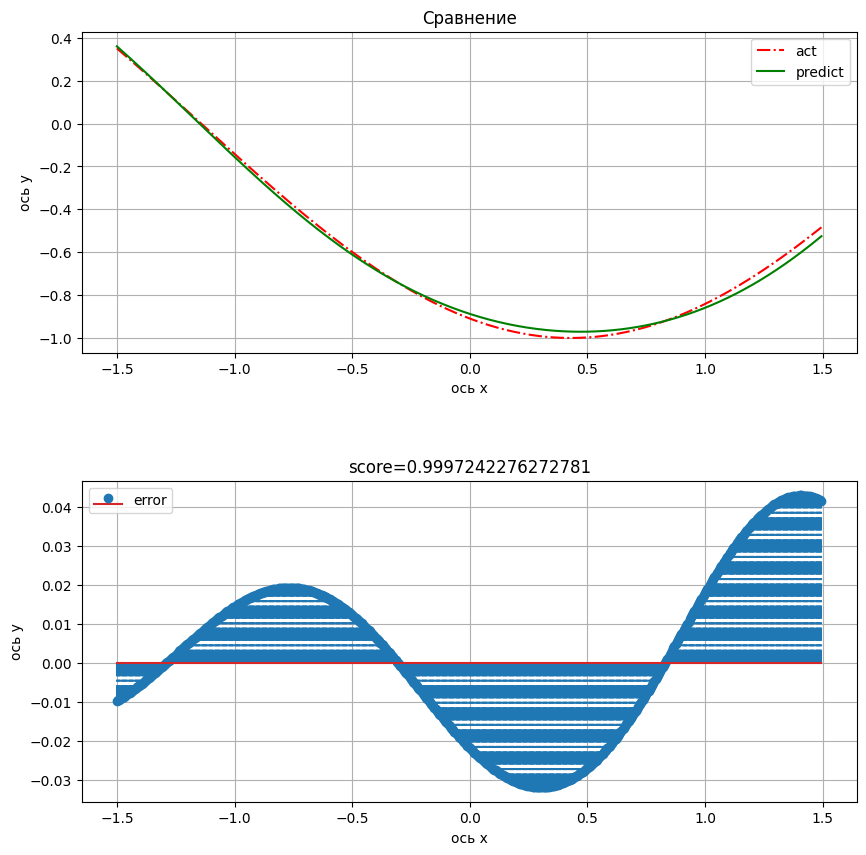

In [95]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots_adjust

x = init_x(0.5, diff=0.005)
preds = np.array(model.predict([[xi] for xi in x]))
acts = np.array(list(map(f, x)))


fig = plt.figure(num=1, facecolor='w', edgecolor='k')
fig.set_figwidth(10)
fig.set_figheight(10)
subplots_adjust(hspace=0.4)

ax = fig.add_subplot(2, 1, 1)
ax.plot(x, acts, color='red', label='act', linestyle='-.')
ax.plot(x, preds, color='green', label='predict', linestyle='-')
ax.set_title('Сравнение')
ax.set_xlabel('ось x')
ax.set_ylabel('ось y')
ax.grid()
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.stem(x, [a - p for p, a in zip(preds, acts)], label=f'error', markerfmt='o', linefmt='-.')
ax.set_title(f'{score=}')
ax.set_xlabel('ось x')
ax.set_ylabel('ось y')
ax.grid()
ax.legend()
# plt.yticks(np.arange(-1, max([i if i is not None else 0 for i in y])+1, 0.5))

plt.show()